In [128]:
import torch
import torch.nn as nn

## nll_loss

In [129]:
import torch
import torch.nn as nn

input = torch.randn(16, 22, 224, 224, requires_grad=True)

target = torch.randint(0, 22, (16, 224, 224))
m = nn.LogSoftmax(dim=1)
loss = nn.NLLLoss(ignore_index=-1)
output = loss(m(input), target)

print(output)
target.shape

tensor(3.5543, grad_fn=<NllLoss2DBackward0>)


torch.Size([16, 224, 224])

## Hadamard

In [1]:
import numpy as np

In [20]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

B = np.array([[2, 2, 2],
              [3, 3, 3], 
              [4, 4, 4]])


In [19]:
element_wise = A * B
element_wise

array([[ 2,  4,  6],
       [12, 15, 18],
       [28, 32, 36]])

In [21]:
A @ B

array([[20, 20, 20],
       [47, 47, 47],
       [74, 74, 74]])

## grayscale

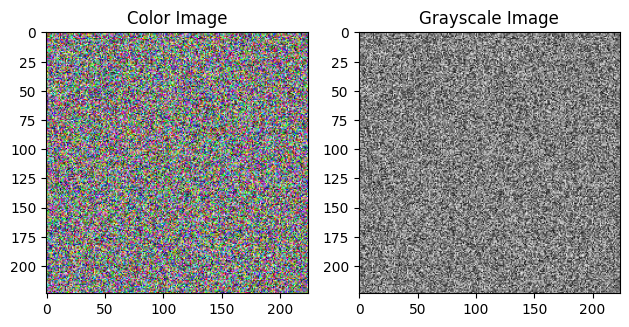

In [130]:
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

color_image = np.random.randint(0, 256, size=(3, 224, 224), dtype=np.uint8)

gray_transform = transforms.Compose([
    transforms.ToPILImage(),        # Convert to PIL Image
    transforms.Grayscale(),         # Convert to grayscale
    transforms.ToTensor()           # Convert to tensor
])

gray_image_tensor = gray_transform(color_image.transpose(1, 2, 0))

plt.subplot(1, 2, 1)
plt.title('Color Image')
plt.imshow(np.transpose(color_image, (1, 2, 0)))  # Transpose for matplotlib

plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image_tensor.squeeze(), cmap='gray')  # Squeeze to remove batch dimension

plt.tight_layout()
plt.show()

## remove one dimension

In [131]:
A = torch.randint(0, 256, (16, 1, 224, 224))
print(A.shape)
print(A.squeeze(1).shape)
print(A.squeeze(3).shape)

torch.Size([16, 1, 224, 224])
torch.Size([16, 224, 224])
torch.Size([16, 1, 224, 224])


In [132]:
log_path = "adils0o"
f"{log_path}/last.th"

'adils0o/last.th'

## logvar

No VAE, a distribuição latente é modelada como uma gaussiana com média (mu) e variância (sigma^2) para cada dimensão do espaço latente. Para garantir que a variância seja positiva, modelamos o logaritmo da variância, que é chamado de logvar.


In [2]:
import torch

logvar = torch.tensor([-1, 1.0, 2.0, 3.0])
std = torch.exp(0.5 * logvar)
print("Variâncias em escala logarítmica (logvar):", logvar)
print("Desvios padrão correspondentes (std):", std)

Variâncias em escala logarítmica (logvar): tensor([-1.,  1.,  2.,  3.])
Desvios padrão correspondentes (std): tensor([0.6065, 1.6487, 2.7183, 4.4817])


## chunks

In [ ]:
import torch

z = torch.arange(0, 16).view(4, 4).float()
z_mean, z_std = torch.chunk(z, 2, dim=1)

# encoder com batch size 4
print(z)

print("\n z mean =", z_mean)
print("\n z std  =", z_std)

# reparameterized 
# meu decoder vai ter a metade das features do z do encoder
print("\n", z_mean + z_std * torch.randn_like(z_std))

"""
torch.Size([16, 3, 128, 128])
x shape >> = torch.Size([16, 3, 128, 128])
z.shape      >> torch.Size([16, 20])
mu.shape     >> torch.Size([16, 10])
logvar.shape >> torch.Size([16, 10])
std.shape    >> torch.Size([16, 10])
reparameterized.shape >> torch.Size([16, 10])
"""

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

 z mean = tensor([[ 0.,  1.],
        [ 4.,  5.],
        [ 8.,  9.],
        [12., 13.]])

 z std  = tensor([[ 2.,  3.],
        [ 6.,  7.],
        [10., 11.],
        [14., 15.]])

 tensor([[-1.4278,  0.5218],
        [-0.4989,  3.4832],
        [11.2079,  5.1997],
        [19.3859, 26.9121]])


## shape

In [1]:
import numpy as np
image_shape = (1, 28, 28)
flattened_size = np.prod(image_shape)
print("Tamanho do vetor achatado:", flattened_size)

Tamanho do vetor achatado: 784


## mse na mao


se fizer o somatorio com numpy, por causa do detach().cpu().numpy()
eu vou perder o gradiente e o backpropagation vai considerar apenas o kl_divergece

In [133]:

reconstruction_loss = (pred - x) ** 2
reconstruction_loss = np.sum(((pred - x) ** 2).detach().cpu().numpy())

kl_divergence = -0.5 * torch.sum(1 + z_logvar - z_mean.pow(2) - z_logvar.exp())
return reconstruction_loss + kl_divergence

NameError: name 'pred' is not defined

entretanto, fazendo o somatorio com torch, o gradiente eh preservado

![image.png](attachment:image.png)

In [ ]:
def elbo_loss(x, pred, z_mean, z_logvar):
    """
    loss = reconstruction_loss + KL
    KL: KL divergence between q(z|x) and p(z)
        KL[ q(z|x) || p(z) ] <==> KL[ N(u, std) || N(0, 1) ]
        https://arxiv.org/pdf/1312.6114.pdf...
        "Solution of -DKL(q(z)||p(z)), Gaussian case" p. 10
        KL = [sum(1 + log(sigma^2) - mu^2 - sigma^2)] / 2
    Args:
        z_mean, z_logvar = torch.chunk(encoder(x), 2, dim=1)

    Returns:
        torch.Tensor: _description_
    """
    reconstruction_loss = torch.sum(((pred - x) ** 2))
    kl_divergence = -0.5 * torch.sum(1 + z_logvar - z_mean.pow(2) - z_logvar.exp())
    return reconstruction_loss + kl_divergence


## Ideias

* Que tal conditional vae? aumentar a capacidade de geracao 
    * se mnist, (naive) treinar um vae por classe
    * (hard) condicionar o vae com a classe durante o treinamento
* O que podemos explorar p visualizar o espaco latente, KL, fronteira de decisao?
    * reducao de dimensionalidade para visualiza
    * treinar com 2 dimensoes (shape mu=1 e std=1) 
    * o que mais?
* Explorar o borrao de fundo
    * deixar o fundo homogeneo e ver se deixa de ficar blurizado
    * deixar dois fundos diferentes (preto e branco) e ve como fica a geracao

In [ ]:
import torch
import torch.nn as nn

In [ ]:

s1 = nn.Linear(1, 1, bias=False)
s1.weight.data = torch.tensor([[-0.5]])
o1 = nn.Sigmoid()

s2 = nn.Linear(1, 1, bias=False)
s2.weight.data = torch.tensor([[0.5]])
o2 = nn.Sigmoid()


x = torch.tensor([[1.0]]) 
y = torch.tensor([[1.0]])



s1_out = s1(x)
o1_out = o1(s1_out)
s2_out = s2(o1_out)
output = o2(s2_out)


print("s1_out", s1_out)
print("o1_out", o1_out)
print("s2_out", s2_out)
print("output", output)

loss = 1/2*(output - y)**2
print("loss", loss)



loss.backward()

print(f" gradient: {loss.item()}")
print("Gradientes dos pesos em s1:", s1.weight.grad)
print("Gradientes dos pesos em s2:", s2.weight.grad)

s1_out tensor([[-0.5000]], grad_fn=<MmBackward0>)
o1_out tensor([[0.3775]], grad_fn=<SigmoidBackward0>)
s2_out tensor([[0.1888]], grad_fn=<MmBackward0>)
output tensor([[0.5471]], grad_fn=<SigmoidBackward0>)
loss tensor([[0.1026]], grad_fn=<MulBackward0>)
 gradient: 0.10258052498102188
Gradientes dos pesos em s1: tensor([[-0.0132]])
Gradientes dos pesos em s2: tensor([[-0.0424]])


# batch error

In [22]:

import torch

x = torch.ones(16, 3, 28, 28)
pred = x + 2
torch.sum(((pred - x) ** 4))

tensor(602112.)

In [7]:
16 * 3 * 28 * 28

37632

# refatorizing 

In [1]:
class Myclass():
    pass

In [4]:
c = Myclass()
dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [6]:
o = object()
dir(o)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [9]:
class MyError():
    pass

raise MyError()

TypeError: exceptions must derive from BaseException

In [10]:
class MyError(Exception):
    pass

raise MyError()

MyError: 

In [21]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

sqr = Square(4)
sqr.area()

16

In [73]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Variable

class Vae(nn.Module):
    def __init__(self, 
                    enc_backbone,
                    dec_backbone, 
                    latent_dim=20, 
                    image_shape=(1, 28, 28), 
                    w_init_method="xavier", 
                    device="cuda"):
        
        super(Vae, self).__init__()
        self.image_shape = image_shape
        self.device = device
        self.features = np.prod(self.image_shape)
        self.latent_dim = latent_dim

        self.encoder = enc_backbone
        self.decoder = dec_backbone

        for layer in self.encoder:
            self.initialize_weights(layer, method=w_init_method)
        for layer in self.decoder:
            self.initialize_weights(layer, method=w_init_method)
        
    
    def initialize_weights(self, layer, method):
        if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.ConvTranspose2d) or isinstance(layer, nn.Linear):
            if method == 'xavier':
                init.xavier_normal_(layer.weight)
            elif method == 'he':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            init.constant_(layer.bias, 0.0)

    def trick(self, mean, std):
        epsilon = torch.randn_like(std)
        return mean + std * epsilon

    def forward(self, x):
        x = x.view(-1, self.features)
        z = self.encoder(x)
        mu, logvar = torch.chunk(z, 2, dim=1)
        std = torch.exp(0.5 * logvar)
        reparameterized = self.trick(mu, std)
        pred = self.decoder(reparameterized)
        pred = pred.reshape(-1, *self.image_shape)
        return pred, mu, std

    def sampler(self, num_samples=16):
        sample = Variable(torch.randn(num_samples, self.latent_dim))
        sample = sample.to(self.device)
        pred = self.decoder(sample)
        pred = pred.reshape(-1, *self.image_shape)
        pred = torch.asarray(pred)
        return pred
    

class LVae(Vae):
    def __init__(self, 
                 latent_dim=20, 
                 image_shape=(1, 28, 28), 
                 w_init_method="xavier", 
                 device="cuda"):
        
        self.features = np.prod(image_shape)
        enc_backbone = nn.Sequential(
            nn.Linear(self.features, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, latent_dim * 2)
        )

        dec_backbone = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, self.features),
            nn.Sigmoid()
        )

        super().__init__(enc_backbone, 
                         dec_backbone,  
                         latent_dim=latent_dim, 
                         image_shape=image_shape, 
                         w_init_method=w_init_method, 
                         device=device)

In [74]:
LVae =  LVae()